## Single Variable Linear Regression
### Use BFGS Method to optimize a LR model for the data provided in the attached file.
### Use Multivariable gradient descent to solve the same problem.
### Evaluate Gradient descent solution and BFGS solution using r2_score.
### Plot the following curves:
#### - Cost vs. iterations.
#### - Cost vs. each parameter.
### Find the solution using sklearn.linear_model.LinearRegression model.
### Compare the results from Gradient descent, BFGS, and sklearn models. Write your conclusion in brief.

# Abdelrahman Tarek Mahmoud

## **Imports**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('RegData.csv', header = None)

In [3]:
df.shape

(13, 2)

In [4]:
x = df.iloc[:,0]
x

0     2.9
1     6.7
2     4.9
3     7.9
4     9.8
5     6.9
6     6.1
7     6.2
8     6.0
9     5.1
10    4.7
11    4.4
12    5.8
Name: 0, dtype: float64

In [5]:
x = np.array(x).reshape(-1,1)
X = np.hstack((np.ones((len(x),1)),x))
print(X.shape)
print(X)

(13, 2)
[[1.         2.9000001 ]
 [1.         6.69999981]
 [1.         4.9000001 ]
 [1.         7.9000001 ]
 [1.         9.80000019]
 [1.         6.9000001 ]
 [1.         6.0999999 ]
 [1.         6.19999981]
 [1.         6.        ]
 [1.         5.0999999 ]
 [1.         4.69999981]
 [1.         4.4000001 ]
 [1.         5.80000019]]


In [6]:
y = df.iloc[:,1]
y = np.array(y).reshape(-1,1)
print(y.shape)
print(y)

(13, 1)
[[4.        ]
 [7.4000001 ]
 [5.        ]
 [7.19999981]
 [7.9000001 ]
 [6.0999999 ]
 [6.        ]
 [5.80000019]
 [5.19999981]
 [4.19999981]
 [4.        ]
 [4.4000001 ]
 [5.19999981]]


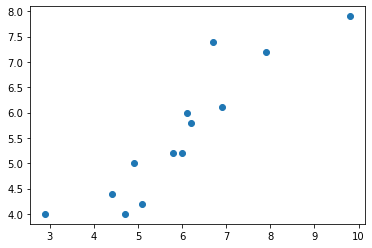

In [7]:
plt.scatter(x,y);

## **BFGS Linear Regression Model**

In [8]:
def BFGS_LR(X,Y,tol = 0.001, iterations = 40, learning_rate = 0.1):
   
    costs = []
    thetas = []
    hypothesis = []
    b = np.eye(2)
    
    # randomly initialize theta
    theta = np.random.rand(2,1).reshape(2,1)
    theta_prev = theta - 0.5
    
    for i in range(iterations):
        # calculate hypothesis
        y_hat = np.dot(X,theta)
        y_hat_prev = np.dot(X,theta_prev)
        
        hypothesis.append(y_hat)
        # calculate error
        e = y_hat - y
        e_prev = y_hat_prev - y
        # mean square error
        mse = (np.dot(e.T,e)/(2*len(y)))[0][0]
        mse_prev = (np.dot(e_prev.T,e_prev)/(2*len(y)))[0][0]
        
        costs.append(mse)
        # calculate gradients
        gradient = np.dot(X.T,e)/len(y)
        gradient_prev = np.dot(X.T,e_prev)/len(y)
        # update theta
        delta_gradient = gradient-gradient_prev
        delta_theta = theta - theta_prev
        
        # b inverse plus equation with substitution of y with delta gradient and x_delta with theta delta
        prt_1 = (np.eye(2) - ((delta_theta@delta_gradient.T)/(delta_gradient.T@delta_theta)))
        prt_2 = ((np.eye(2) - (delta_gradient @ delta_theta.T)/(delta_gradient.T@delta_theta)))                                                            
        prt_3 = ((delta_theta@delta_theta.T)/(delta_gradient.T@delta_theta))

        B_inv_plus = prt_1 @ b @ prt_2 + prt_3  
 
        thetas.append(theta)
        theta_new = theta - learning_rate * np.dot(B_inv_plus,gradient)
        
        # Stop condition
        if(i>0 and np.abs(costs[i]-costs[i-1])<0.001):
            print("stopped at iteration {}".format(i))
            break
            
        theta_prev=theta      
        theta=theta_new
    return np.array(thetas), costs, hypothesis


In [9]:
theta,costs ,hypothesis= BFGS_LR(X,y)

stopped at iteration 39


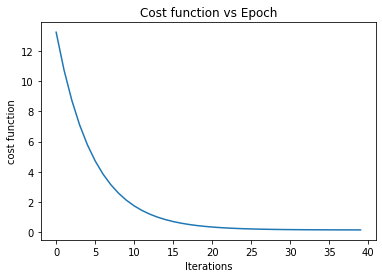

In [10]:
plt.plot(costs)
plt.xlabel("Iterations");
plt.ylabel("cost function");
plt.title("Cost function vs Epoch");

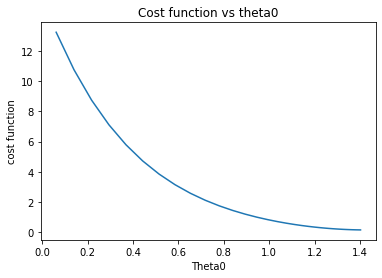

In [11]:
plt.plot(theta[:,0],costs);
plt.xlabel("Theta0");
plt.ylabel("cost function");
plt.title("Cost function vs theta0");

In [12]:
r2_score(y,hypothesis[-1])

0.8168739114159269

## **Multivariable Gradient Descent**

In [13]:
def vectorized_gradient(x,y,learning_rate = 0.001,Epoch = 100):
    theta = np.zeros((x.shape[1],1))
    costs = []
    thetas = []
    hypothesis = []
    for i in range(Epoch):
        #calculate hypothesis
        y_hat = np.dot(x,theta)
        hypothesis.append(y_hat)
        #calculate error
        e = y_hat - y
        #mean square error
        mse = (np.dot(e.T,e)/(2*len(y)))[0][0]
        thetas.append(theta.reshape(x.shape[1]))
        costs.append(mse)
        if(i>0 and np.abs(costs[i]-costs[i-1])<0.001):
            print("stopped at iteration {}".format(i))
            break
        #calculate gradients
        gradient = np.dot(x.T,e)/len(y)
        #update theta
        theta = theta - learning_rate*gradient

    return np.array(thetas), costs , hypothesis

In [14]:
theta,costs ,hypothesis = vectorized_gradient(X,y)

stopped at iteration 91


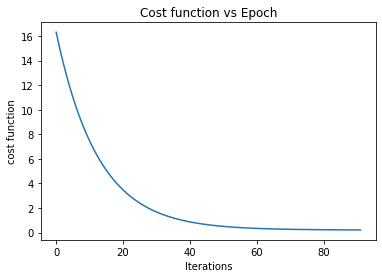

In [15]:
plt.plot(costs)
plt.xlabel("Iterations");
plt.ylabel("cost function");
plt.title("Cost function vs Epoch");

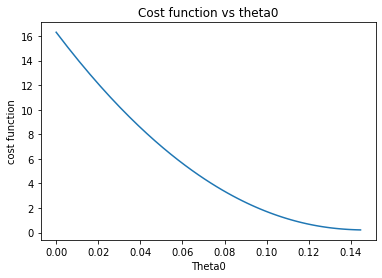

In [16]:
plt.plot(theta[:,0],costs);
plt.xlabel("Theta0");
plt.ylabel("cost function");
plt.title("Cost function vs theta0");

In [17]:
r2_score(y,hypothesis[-1])

0.7333176762950011

## **Sklearn**

In [18]:
lr = LinearRegression().fit(X,y)

In [19]:
r2_score(y,lr.predict(X))

0.8213156778363777